In [1]:
#enables chart rendering
%matplotlib inline

In [2]:
!pip install --upgrade --force-reinstal --no-deps git+https://github.com/jlondal/pyrugga.git

  Cloning https://github.com/jlondal/pyrugga.git to /tmp/pip-req-build-k24ulw9u
  Stored in directory: /tmp/pip-ephem-wheel-cache-o_462l3a/wheels/c4/c6/06/41574b4a3a768b91eeec22fe1a22c5ca0f5a9d0bdc0d36c6fa
Successfully built pyrugga
  Found existing installation: pyrugga 1.0.1
    Uninstalling pyrugga-1.0.1:
      Successfully uninstalled pyrugga-1.0.1


# First 10 Minutes 

Welcome to your first 10 minutes with Pyrugga. In this tutorial you will learn how to convert a Superscout XML into a Match object analyse a game of Rugby. 

The first step is to import Pyrugga library. This is as simple us typing 

In [3]:
import pyrugga as pgr
import pandas as pd
import numpy as np

Pyrugga requires a Super Scout file containing a play by play descriptions of a match. They are stored in an XML format which is not great for statistical analysis, but useful for other things. We need to convert the XML format  into something a little more friendly, a Pandas Dataframes. 

In [50]:
df = pgr.Match('game_2.xml')

A Match object contains a number of functions and Dataframes to help us analyse a match 

**Dataframes**

* Summary -- Summary of the match 
* Events -- Description of each action 
* Timeline -- A timeline of the match with periods ending when either possession of the ball changes or there was a stopage in play 

**Functions**


* getRef -- Will return the name of the referee
* Draw -- Will return if the match was drawn ?
* HomeWin -- Will return if home team won ? 
  

* getTerritoryY -- amount of time each team spent in a zone (breadth of the pitch)
* getTerritoryX -- amount of time each team spent in a zone (length of the pitch)
* getTerritory -- amount of time each team spent in a zone (both breadth & length of the pitch)



to view the summary  line of a match

In [51]:
df.summary

,fixture_code,ref_id,ref_name,fixture_date,fx_week,awayteam,hometeam,home_score,away_score
0,918053,1000428,O'Keeffe,17/03/2018,5,France,Wales,14,13


to access the first 10 events of a match 

In [52]:
df.events.head(10)

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
0,16737669,NaN,0,NaN,Period,Start Period,918053.0,0,0,0,...,0,0,0,0.0,Wales,50,0,34,0,0
0,16737670,NaN,0,NaN,Restart,50m Restart Kick,918053.0,0,0,0,...,0,0,0,10.0,France,50,83,34,14,0
75,16737671,NaN,0,NaN,Collection,Restart Catch,918053.0,0,4,0,...,4,4,1,12.0,Wales,18,0,55,0,0
874,16737672,Dominant Contact,0,NaN,Carry,Restart Return,918053.0,0,8,6,...,8,8,1,12.0,Wales,28,0,54,0,0
538,16737673,NaN,0,NaN,Tackle,Chase Tackle,918053.0,0,6,0,...,6,6,1,12.0,France,72,0,14,0,0
17,16737674,NaN,0,NaN,Ruck,NaN,918053.0,0,7,0,...,11,7,1,0.0,Wales,28,0,54,0,0
28,16737675,NaN,0,Kick In Play,Kick,Box,918053.0,0,12,0,...,12,12,1,9.0,Wales,28,49,54,57,0
199,16737676,NaN,0,NaN,Possession,50m Restart,918053.0,0,12,31,...,15,4,1,0.0,Wales,18,49,55,58,0
89,16737677,NaN,0,NaN,Collection,Defensive Loose Ball,918053.0,0,15,0,...,15,15,2,15.0,France,51,0,10,0,0
901,16737678,Neutral Contact,0,NaN,Carry,Kick Return,918053.0,0,19,6,...,19,19,2,15.0,France,54,0,9,0,0


to access the the Sharks first periods of play 

In [53]:
df.timeline.query('team_name == "Natal Sharks"').head(3)

,period,set_num,team_name,points,x_coord,x_coord_end,y_coord,y_coord_end,meters_gained,dist_traveled,...,fly_half_defensive,left_wing_defensive,inside_centre_defensive,outside_centre_defensive,right_wing_defensive,full_back_defensive,France,Wales,France_points,Wales_points


And so on ...

In [54]:
df.Draw()

False

In [55]:
df.HomeWin()

True

In [56]:
df.getRef()

"O'Keeffe"

# Some Analysis

Lets do to something a little more useful. To working which team had the most possession during a game. 

Remember our match is still stored in variable **df** and it contains three Dataframes called

* **events**, a blow by blow account of every action in a match
* **timelines**, match broken into periods of play ending with a stopage in play or change of posession 
* **summary**, a summary of the match

To access the timeline 

```python
df.timeline
```

then we will want to group by team_name and sum up the length of time each team had the ball. Group by is as simple as just ".groupby('team_name')" 

```python
df.timeline.groupby('team_name') 
```

and then to sum add ".sum()" and for length add "['length']" leaving us with 

In [57]:
df.timeline.groupby('team_name').sum()['length'] 

team_name
France    1139
Wales      984
Name: length, dtype: int64

The Sharks had the ball 1349 seconds compare to Province 707 secounds.  

If we wanted to see this in a percentage we need to sum the column which requires adding another ".sum()"


In [58]:
df.timeline.groupby('team_name').sum()['length'] / (df.timeline.groupby('team_name').sum()['length'].sum())

team_name
France    0.536505
Wales     0.463495
Name: length, dtype: float64

Say we want to see points per second with ball. We can see Province was slightly more effective scoring points than The Sharks.

In [59]:
df.timeline.groupby(['team_name']).sum()['length'] / (df.timeline.groupby('team_name')['points'].sum())

team_name
France    87.615385
Wales     70.285714
dtype: float64

But what about that other TV statistics we tend to see such as territory I here you say. There are three functions to help us calculate that

In [60]:
df.getTerritory(perc=True)

team_name          France     Wales
y_coord x_coord                    
1       1        0.002478  0.002506
        2        0.007435  0.006266
        3        0.006196  0.011278
        4        0.032218  0.067669
        5        0.042131  0.032581
        6        0.019827  0.030075
        7        0.009913  0.038847
        8        0.006196  0.017544
        9        0.000000  0.020050
        10       0.001239  0.001253
2       1        0.002478  0.006266
        2        0.016109  0.003759
        3        0.012392  0.030075
        4        0.018587  0.046366
        5        0.030979  0.017544
        6        0.038414  0.051378
        7        0.004957  0.025063
        8        0.003717  0.020050
        9        0.000000  0.011278
        10       0.002478  0.000000
3       1        0.001239  0.002506
        2        0.002478  0.011278
        3        0.021066  0.022556
        4        0.019827  0.028822
        5        0.035936  0.058897
        6        0.029740  0.022556
        7        0.007435  0.011278
        8        0.001239  0.006266
        9        0.001239  0.000000
        10       0.008674  0.000000
...                   ...       ...
4       4        0.029740  0.038847
        5        0.042131  0.023810
        6        0.040892  0.035088
        7        0.028501  0.025063
        8        0.002478  0.001253
        10       0.003717  0.000000
5       1        0.017348  0.002506
        2        0.012392  0.008772
        3        0.016109  0.021303
        4        0.033457  0.015038
        5        0.017348  0.020050
        6        0.048327  0.008772
        7        0.029740  0.008772
        8        0.008674  0.025063
        9        0.002478  0.007519
        10       0.009913  0.000000
6       1        0.008674  0.001253
        2        0.012392  0.013784
        3        0.032218  0.012531
        4        0.042131  0.027569
        5        0.030979  0.040100
        6        0.043371  0.025063
        7        0.014870  0.008772
        8        0.014870  0.003759
        10       0.009913  0.000000
7       3        0.006196  0.001253
        4        0.009913  0.000000
        5        0.011152  0.000000
        7        0.006196  0.000000
        8        0.006196  0.000000

[63 rows x 2 columns]

In [61]:
# Territory in the length of the pitch
df.getTerritoryX(perc=True)

team_name,France,Wales
x_coord,,
1,0.032941,0.019070
2,0.051765,0.048868
3,0.105882,0.101311
4,0.178824,0.220501
5,0.217647,0.187128
6,0.221176,0.176400
7,0.103529,0.125149
8,0.050588,0.083433
9,0.003529,0.036949


In [62]:
# Territory in the width of the pitch
df.getTerritoryY(perc=True)

team_name,France,Wales
y_coord,,
1,0.126536,0.225962
2,0.133907,0.219952
3,0.127764,0.163462
4,0.168305,0.140625
5,0.194103,0.116587
6,0.210074,0.132212
7,0.039312,0.001202


In [63]:
df.getTerritoryMetric()

,team_name,territory
0,France,0.503256
1,Wales,0.496744


We can also build out plots to see that the Sharks play slight more on the left side than the right while the Storms do not have much preferance

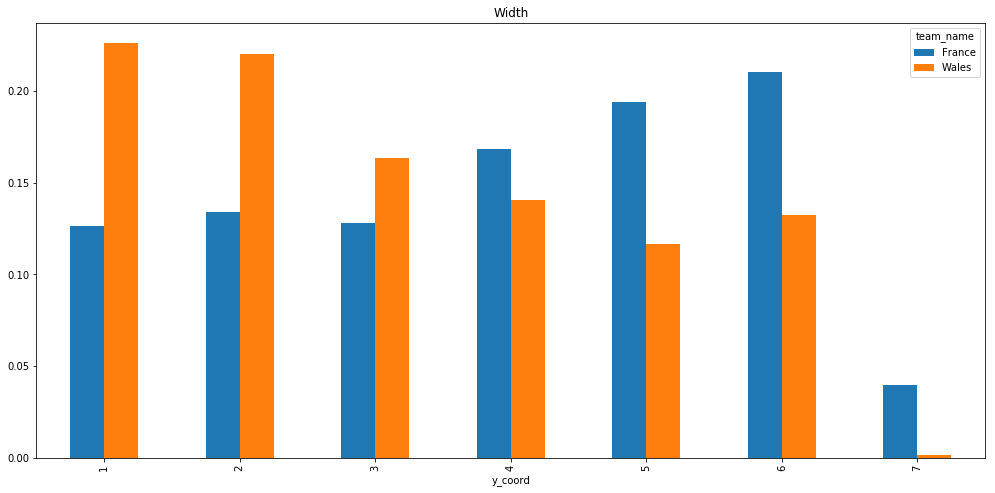

In [64]:
df.getTerritoryY(perc=True).plot(kind='bar',figsize=(17,8),title='Width')

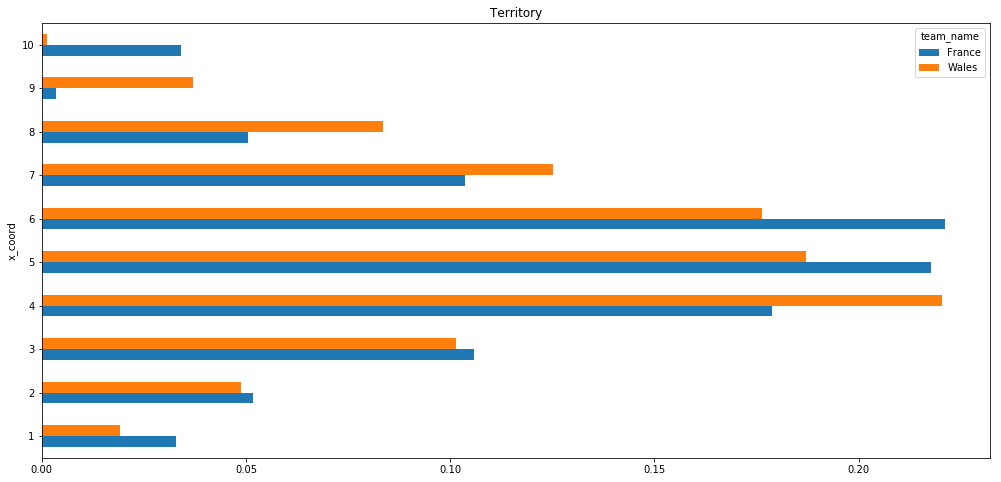

In [65]:
df.getTerritoryX(perc=True).plot(kind='barh',figsize=(17,8),title='Territory')

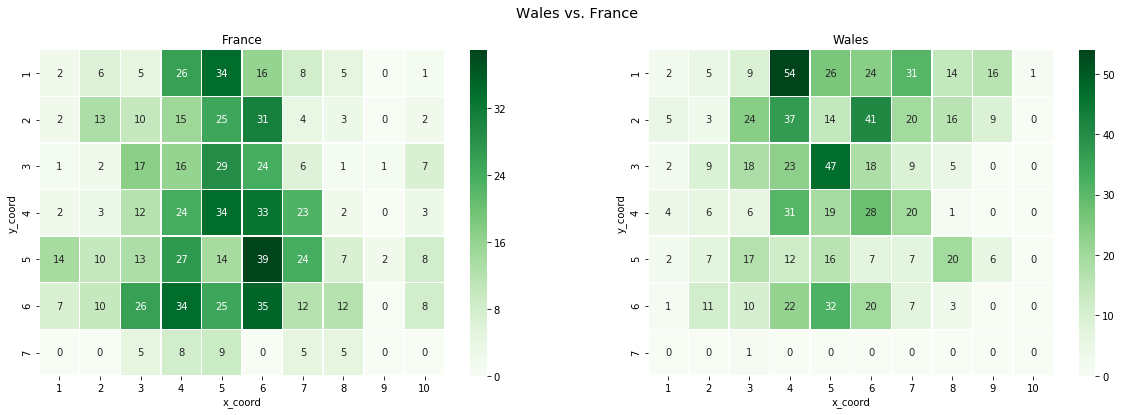

In [66]:
df.heat_map()

In [67]:
df.events.groupby('event').count()['action_id'].sort_values(ascending=False)

event
Tackle                 349
Pass                   320
Carry                  240
Ruck                   182
Collection              96
Possession              76
Sequence                72
Attacking Qualities     53
Kick                    51
Offensive Scrum         40
Defensive Scrum         40
Missed Tackle           38
Turnover                32
Penalty Conceded        22
Lineout Throw           20
Lineout Take            20
Scrum                   20
Period                  17
Maul                    14
Ref Review              11
Restart                 11
Goal Kick                9
Try                      2
Name: action_id, dtype: int64

In [68]:
df.events.query('event == "Goal Kick"')

,action_id,additional,advantage,description,event,event_type,fixture_code,home_team_advantage,match_time,metres,...,ps_endstamp,ps_timestamp,set_num,shirt_no,team_name,x_coord,x_coord_end,y_coord,y_coord_end,points
62,16737748,NaN,0,NaN,Goal Kick,Drop Goal,918053.0,0,300,0,...,180,180,5,10.0,France,67,106,32,32,3
67,16737768,NaN,0,NaN,Goal Kick,Conversion,918053.0,2,509,0,...,309,309,6,15.0,Wales,76,105,12,47,0
68,16737849,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,2,926,0,...,566,566,11,15.0,Wales,75,0,16,0,3
69,16737962,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,5,1513,0,...,913,913,18,15.0,Wales,75,0,17,0,3
64,16738074,NaN,0,NaN,Goal Kick,Conversion,918053.0,3,2125,0,...,1302,1302,22,9.0,France,89,106,34,35,2
70,16738278,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,1,3116,0,...,2095,2095,29,15.0,Wales,58,0,24,0,3
65,16738525,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,4,4208,0,...,2820,2820,38,9.0,France,64,0,55,0,0
66,16743167,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,4,4846,0,...,4286,4286,48,9.0,France,75,0,46,0,3
63,16743524,NaN,0,NaN,Goal Kick,Penalty Goal,918053.0,1,6756,0,...,5695,5695,63,10.0,France,73,0,44,0,0


In [69]:
df.events.groupby('event_type').count()['action_id'].sort_values(ascending=False)

event_type
Complete Pass                     282
Line Tackle                       241
Other Carry                        93
One Out Drive                      91
Kick Return                        43
Scrum Half Pass                    40
Defender Beaten                    38
Lineout                            38
Chase Tackle                       37
Scrum                              30
Attacking Loose Ball               23
Other Tackle                       23
Bumped Off                         22
Guard Tackle                       22
Defensive Loose Ball               20
Defensive Catch                    19
50m Restart                        18
Pick And Go                        17
Cover Tackle                       16
Offload                            15
Jackal                             14
Territorial                        14
Touch Kick                         14
Incomplete Pass                    13
Penalty Kick                       13
Throw Middle                       12
R

In [70]:
df.events.groupby('description').count()['action_id'].sort_values(ascending=False)

description
Tackle Assist          101
Crossed Gainline        92
Failed Gainline         56
Neutral                 46
Kick In Play            32
Catch And Drive         23
Defence                 14
Penalty Kick            13
Retained Collection     11
Initial Break           10
Off The Top              9
Offence                  8
Kick In Own 22           6
Catch And Pass           6
Positive                 4
Negative                 2
Name: action_id, dtype: int64

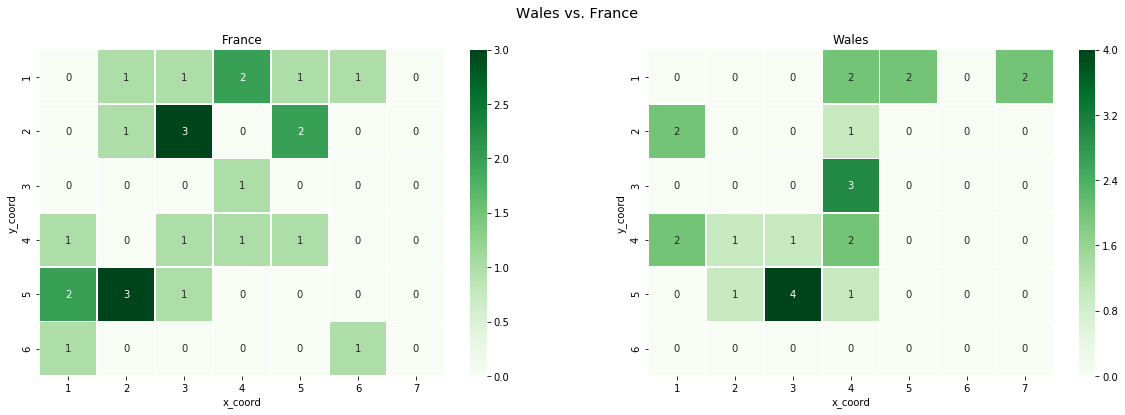

In [71]:
df.heat_map(event='Kick')

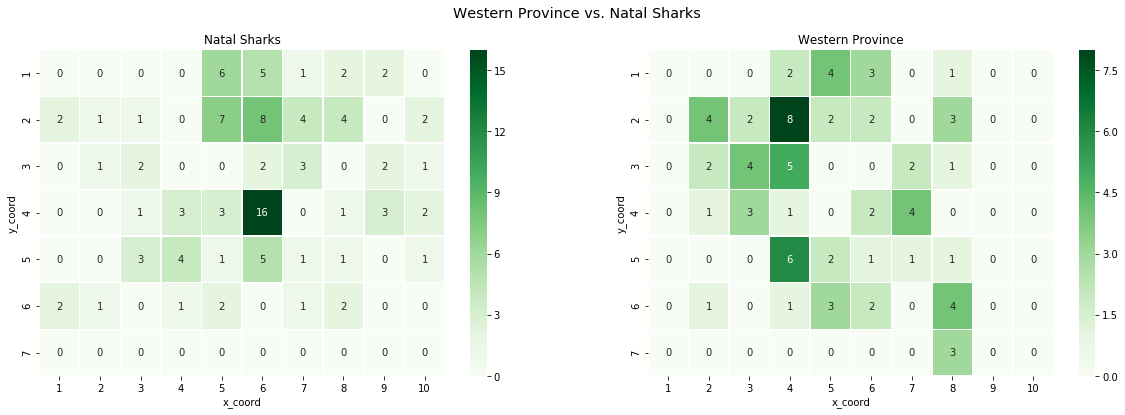

In [25]:
df.heat_map(event='Pass')

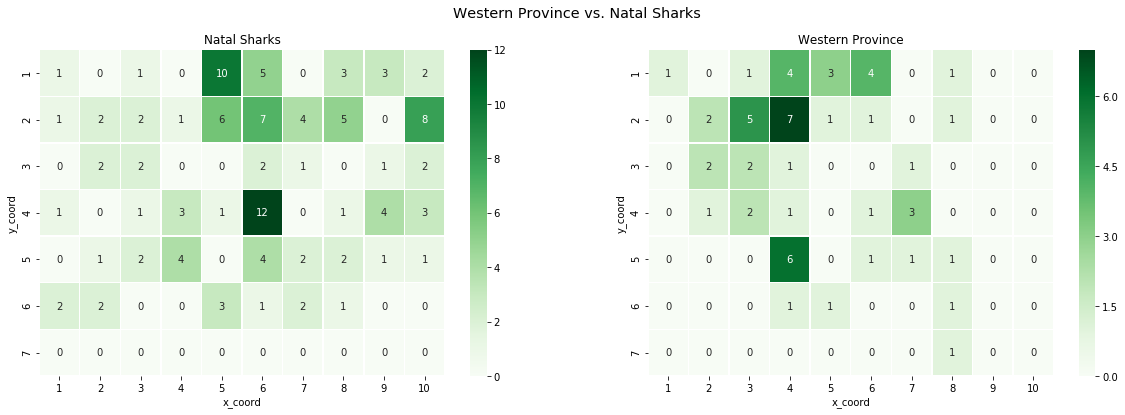

In [26]:
df.heat_map(event='Carry')

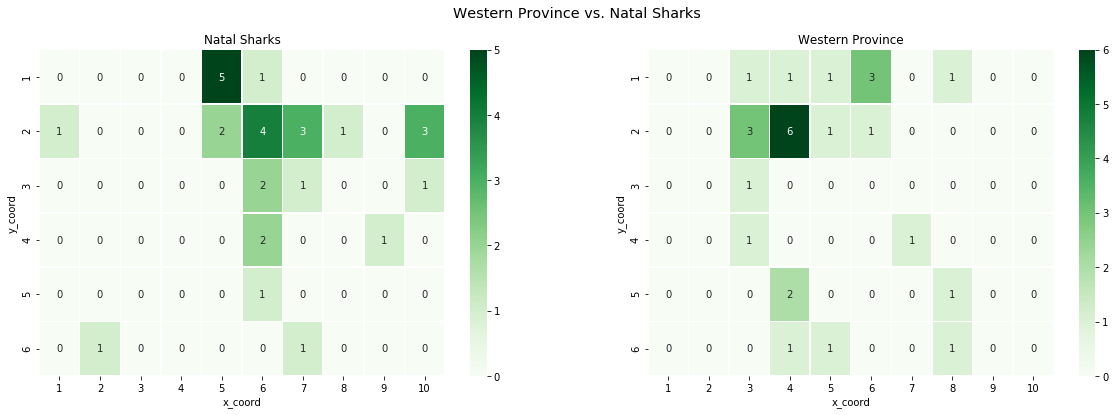

In [34]:
df.heat_map(description='Failed Gainline')

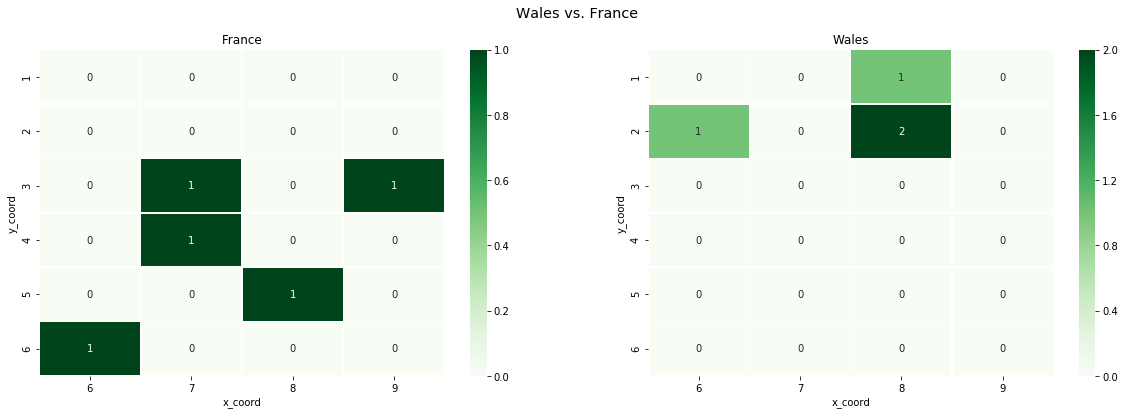

In [72]:
df.heat_map(event='Goal Kick')

## Players

Produces a summary of each player with the option to normilised either via minutes, actions or phases. 

In [28]:
df.player_summary(norm='mins')

actions  mins  average_phase  \
team_name        position players_name                                         
Natal Sharks     1.0      Juan Schoeman              48  8187       1.895833   
                 2.0      Armand van der Merwe       31  6192       3.129032   
                          Chiliboy Ralepelle         12  1268       3.666667   
                 3.0      Coenraad Oosthuizen        27  4086       2.111111   
                          Thomas du Toit             22  4098       1.681818   
                 4.0      Gideon Koegelenberg        23  7341       2.956522   
                 5.0      Hyron Andrews              12  6295       1.916667   
                 6.0      Tyler Paul                 31  7408       2.677419   
                 7.0      Jacques Vermeulen          16  1813       2.437500   
                          Jean-Luc du Preez          26  5537       2.576923   
                 8.0      Daniel du Preez            44  7987       3.022727   
                 9.0      Cameron Wright             36  1344       4.638889   
                          Louis Schreuder            60  6297       2.850000   
                 10.0     Robert du Preez            42  8095       1.833333   
                 11.0     Aphelele Fassi             20  7625       2.250000   
                 12.0     Marius Louw                17  7377       3.470588   
                 13.0     Jeremy Ward                12  7645       2.083333   
                 14.0     Sibusiso Nkosi             24  6892       2.166667   
                 15.0     Curwin Bosch               19  6109       1.263158   
                          Jacobus Van Wyk             8  1094       2.500000   
Western Province 1.0      Alistair Vermaak           35  8089       1.942857   
                          Caylib Oosthuizen           4   603       4.250000   
                 2.0      Mbongeni Mbonami           16  3726       1.437500   
                          Siyabonga Ntubeni          23  3861       2.434783   
                 3.0      Michael Kumbirai           11  1469       2.272727   
                          Wilco Louw                 32  6007       1.968750   
                 4.0      Chris Van Zyl              15  5606       2.000000   
                          Salmaan Moerat              9  1925       3.000000   
                 5.0      JD Schickerling            33  7841       3.575758   
                 6.0      Kobus Van Dyk              17  5991       2.235294   
                 7.0      Ernst van Rhyn             29  7677       3.827586   
                 8.0      Jaco Coetzee                8  2891       4.750000   
                          Sikhumbuzo Notshe          22  5506       3.000000   
                 9.0      Hershel Jantjies           66  6888       2.575758   
                          Justin Phillips             7   447       2.857143   
                 10.0     Dan Kriel                   5   146       2.800000   
                          Joshua Stander             47  7071       2.617021   
                 11.0     JJ Engelbrecht              8  1597       1.625000   
                          SP Marais                  21  5006       1.523810   
                 12.0     Damian Willemse            35  7602       1.942857   
                 13.0     Ruhan Nel                  27  7360       3.259259   
                 14.0     Sergeal Petersen           24  7218       2.875000   
                 15.0     Dillyn Leyds               36  7532       2.888889   

                                                phases  points_scored  \
team_name        position players_name                                  
Natal Sharks     1.0      Juan Schoeman             91              0   
                 2.0      Armand van der Merwe      97              5   
                          Chiliboy Ralepelle        44              0   
                 3.0      Coenraad Oosthuizen       57              0   
         

In [29]:
df.player_summary(norm='actions')

actions  mins  average_phase  \
team_name        position players_name                                         
Natal Sharks     1.0      Juan Schoeman              48  8187       1.895833   
                 2.0      Armand van der Merwe       31  6192       3.129032   
                          Chiliboy Ralepelle         12  1268       3.666667   
                 3.0      Coenraad Oosthuizen        27  4086       2.111111   
                          Thomas du Toit             22  4098       1.681818   
                 4.0      Gideon Koegelenberg        23  7341       2.956522   
                 5.0      Hyron Andrews              12  6295       1.916667   
                 6.0      Tyler Paul                 31  7408       2.677419   
                 7.0      Jacques Vermeulen          16  1813       2.437500   
                          Jean-Luc du Preez          26  5537       2.576923   
                 8.0      Daniel du Preez            44  7987       3.022727   
                 9.0      Cameron Wright             36  1344       4.638889   
                          Louis Schreuder            60  6297       2.850000   
                 10.0     Robert du Preez            42  8095       1.833333   
                 11.0     Aphelele Fassi             20  7625       2.250000   
                 12.0     Marius Louw                17  7377       3.470588   
                 13.0     Jeremy Ward                12  7645       2.083333   
                 14.0     Sibusiso Nkosi             24  6892       2.166667   
                 15.0     Curwin Bosch               19  6109       1.263158   
                          Jacobus Van Wyk             8  1094       2.500000   
Western Province 1.0      Alistair Vermaak           35  8089       1.942857   
                          Caylib Oosthuizen           4   603       4.250000   
                 2.0      Mbongeni Mbonami           16  3726       1.437500   
                          Siyabonga Ntubeni          23  3861       2.434783   
                 3.0      Michael Kumbirai           11  1469       2.272727   
                          Wilco Louw                 32  6007       1.968750   
                 4.0      Chris Van Zyl              15  5606       2.000000   
                          Salmaan Moerat              9  1925       3.000000   
                 5.0      JD Schickerling            33  7841       3.575758   
                 6.0      Kobus Van Dyk              17  5991       2.235294   
                 7.0      Ernst van Rhyn             29  7677       3.827586   
                 8.0      Jaco Coetzee                8  2891       4.750000   
                          Sikhumbuzo Notshe          22  5506       3.000000   
                 9.0      Hershel Jantjies           66  6888       2.575758   
                          Justin Phillips             7   447       2.857143   
                 10.0     Dan Kriel                   5   146       2.800000   
                          Joshua Stander             47  7071       2.617021   
                 11.0     JJ Engelbrecht              8  1597       1.625000   
                          SP Marais                  21  5006       1.523810   
                 12.0     Damian Willemse            35  7602       1.942857   
                 13.0     Ruhan Nel                  27  7360       3.259259   
                 14.0     Sergeal Petersen           24  7218       2.875000   
                 15.0     Dillyn Leyds               36  7532       2.888889   

                                                  phases  points_scored  \
team_name        position players_name                                    
Natal Sharks     1.0      Juan Schoeman         1.895833       0.000000   
                 2.0      Armand van der Merwe  3.129032       0.161290   
                          Chiliboy Ralepelle    3.666667       0.000000   
                 3.0      Coenraad Oosthuizen   2.111111       0.000000 

In [30]:
df.player_summary(norm='phases')

actions  mins  average_phase  \
team_name        position players_name                                         
Natal Sharks     1.0      Juan Schoeman              48  8187       1.895833   
                 2.0      Armand van der Merwe       31  6192       3.129032   
                          Chiliboy Ralepelle         12  1268       3.666667   
                 3.0      Coenraad Oosthuizen        27  4086       2.111111   
                          Thomas du Toit             22  4098       1.681818   
                 4.0      Gideon Koegelenberg        23  7341       2.956522   
                 5.0      Hyron Andrews              12  6295       1.916667   
                 6.0      Tyler Paul                 31  7408       2.677419   
                 7.0      Jacques Vermeulen          16  1813       2.437500   
                          Jean-Luc du Preez          26  5537       2.576923   
                 8.0      Daniel du Preez            44  7987       3.022727   
                 9.0      Cameron Wright             36  1344       4.638889   
                          Louis Schreuder            60  6297       2.850000   
                 10.0     Robert du Preez            42  8095       1.833333   
                 11.0     Aphelele Fassi             20  7625       2.250000   
                 12.0     Marius Louw                17  7377       3.470588   
                 13.0     Jeremy Ward                12  7645       2.083333   
                 14.0     Sibusiso Nkosi             24  6892       2.166667   
                 15.0     Curwin Bosch               19  6109       1.263158   
                          Jacobus Van Wyk             8  1094       2.500000   
Western Province 1.0      Alistair Vermaak           35  8089       1.942857   
                          Caylib Oosthuizen           4   603       4.250000   
                 2.0      Mbongeni Mbonami           16  3726       1.437500   
                          Siyabonga Ntubeni          23  3861       2.434783   
                 3.0      Michael Kumbirai           11  1469       2.272727   
                          Wilco Louw                 32  6007       1.968750   
                 4.0      Chris Van Zyl              15  5606       2.000000   
                          Salmaan Moerat              9  1925       3.000000   
                 5.0      JD Schickerling            33  7841       3.575758   
                 6.0      Kobus Van Dyk              17  5991       2.235294   
                 7.0      Ernst van Rhyn             29  7677       3.827586   
                 8.0      Jaco Coetzee                8  2891       4.750000   
                          Sikhumbuzo Notshe          22  5506       3.000000   
                 9.0      Hershel Jantjies           66  6888       2.575758   
                          Justin Phillips             7   447       2.857143   
                 10.0     Dan Kriel                   5   146       2.800000   
                          Joshua Stander             47  7071       2.617021   
                 11.0     JJ Engelbrecht              8  1597       1.625000   
                          SP Marais                  21  5006       1.523810   
                 12.0     Damian Willemse            35  7602       1.942857   
                 13.0     Ruhan Nel                  27  7360       3.259259   
                 14.0     Sergeal Petersen           24  7218       2.875000   
                 15.0     Dillyn Leyds               36  7532       2.888889   

                                                phases  points_scored  \
team_name        position players_name                                  
Natal Sharks     1.0      Juan Schoeman            1.0       0.000000   
                 2.0      Armand van der Merwe     1.0       0.051546   
                          Chiliboy Ralepelle       1.0       0.000000   
                 3.0      Coenraad Oosthuizen      1.0       0.000000   
         

In [31]:
df.player_summary()

actions  mins  average_phase  \
team_name        position players_name                                         
Natal Sharks     1.0      Juan Schoeman              48  8187       1.895833   
                 2.0      Armand van der Merwe       31  6192       3.129032   
                          Chiliboy Ralepelle         12  1268       3.666667   
                 3.0      Coenraad Oosthuizen        27  4086       2.111111   
                          Thomas du Toit             22  4098       1.681818   
                 4.0      Gideon Koegelenberg        23  7341       2.956522   
                 5.0      Hyron Andrews              12  6295       1.916667   
                 6.0      Tyler Paul                 31  7408       2.677419   
                 7.0      Jacques Vermeulen          16  1813       2.437500   
                          Jean-Luc du Preez          26  5537       2.576923   
                 8.0      Daniel du Preez            44  7987       3.022727   
                 9.0      Cameron Wright             36  1344       4.638889   
                          Louis Schreuder            60  6297       2.850000   
                 10.0     Robert du Preez            42  8095       1.833333   
                 11.0     Aphelele Fassi             20  7625       2.250000   
                 12.0     Marius Louw                17  7377       3.470588   
                 13.0     Jeremy Ward                12  7645       2.083333   
                 14.0     Sibusiso Nkosi             24  6892       2.166667   
                 15.0     Curwin Bosch               19  6109       1.263158   
                          Jacobus Van Wyk             8  1094       2.500000   
Western Province 1.0      Alistair Vermaak           35  8089       1.942857   
                          Caylib Oosthuizen           4   603       4.250000   
                 2.0      Mbongeni Mbonami           16  3726       1.437500   
                          Siyabonga Ntubeni          23  3861       2.434783   
                 3.0      Michael Kumbirai           11  1469       2.272727   
                          Wilco Louw                 32  6007       1.968750   
                 4.0      Chris Van Zyl              15  5606       2.000000   
                          Salmaan Moerat              9  1925       3.000000   
                 5.0      JD Schickerling            33  7841       3.575758   
                 6.0      Kobus Van Dyk              17  5991       2.235294   
                 7.0      Ernst van Rhyn             29  7677       3.827586   
                 8.0      Jaco Coetzee                8  2891       4.750000   
                          Sikhumbuzo Notshe          22  5506       3.000000   
                 9.0      Hershel Jantjies           66  6888       2.575758   
                          Justin Phillips             7   447       2.857143   
                 10.0     Dan Kriel                   5   146       2.800000   
                          Joshua Stander             47  7071       2.617021   
                 11.0     JJ Engelbrecht              8  1597       1.625000   
                          SP Marais                  21  5006       1.523810   
                 12.0     Damian Willemse            35  7602       1.942857   
                 13.0     Ruhan Nel                  27  7360       3.259259   
                 14.0     Sergeal Petersen           24  7218       2.875000   
                 15.0     Dillyn Leyds               36  7532       2.888889   

                                                phases  points_scored  \
team_name        position players_name                                  
Natal Sharks     1.0      Juan Schoeman             91              0   
                 2.0      Armand van der Merwe      97              5   
                          Chiliboy Ralepelle        44              0   
                 3.0      Coenraad Oosthuizen       57              0   
         